In [83]:
#!/Tsan/bin/python
# -*- coding: utf-8 -*-

In [84]:
# Libraries To Use
from __future__ import division 
import numpy as np
import pandas as pd
import statsmodels.api as sm
import os
from datetime import datetime,time,date
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector 
import cvxopt as cv
from cvxopt import solvers
from sklearn.covariance import  ShrunkCovariance
import scipy as sp

In [85]:
import json

In [86]:
with open('conf.json', 'r') as fd:
    conf = json.load(fd)
cnx= mysql.connector.connect(**conf['src_db'])

In [87]:
%matplotlib inline

In [88]:
tableName ='fund_nv_standard_w' # table to query 
indexID = 'hs300' # benchmark

In [89]:
def get_simplied_fund_nw(fundID,tableName =tableName):
    '''Get simplied fund data which has only two columns: date and the corresponding networth
    Input:
    fundID: String, the fundID of the fund, JRXXXXX alike.
    tableName : String, the corresponding table name of the fund net worth data
    Return: DataFrame, which has only two columns: date and the corresponding networth,
    and names of the columns are respectively date and fundID.
    '''
    
    try:
        #sql_query='select id,name from student where  age > %s' 
        cursor = cnx.cursor()
        sql = "select statistic_date,swanav from %s where fund_id = '%s'" % (tableName,fundID)
        cursor.execute(sql)
        result = cursor.fetchall()
    finally:
        pass
    pdResult = pd.DataFrame(result,dtype =float)
    pdResult.columns = ['date',fundID]
    pdResult = pdResult.drop_duplicates().set_index('date')
    pdResult = pdResult.dropna(axis=0)
    pdResult.index = pd.to_datetime(pdResult.index)
    pdResult = pdResult.fillna(method = 'ffill')
    #pdResult ['weekly_return'] = pdResult['net_worth'].pct_change()
    return pdResult

In [90]:
# test_list
fund_list = ['JR000007','JR000050','JR000052','JR000053','JR000169','JR000170','JR000171','JR000185','JR000186','JR000278']
NumOfAsset = len(fund_list)

In [91]:
get_simplied_fund_nw(fund_list[0],tableName =tableName)

,JR000007
date,
2013-04-09,1.000
2013-04-26,0.998
2013-05-31,1.005
2013-06-30,1.032
2013-07-26,1.057
2013-08-30,1.063
2013-09-30,1.065
2013-10-10,1.057
2013-10-25,1.028


In [92]:
fund_data = map(get_simplied_fund_nw, fund_list)

In [93]:
fund_data_merged = reduce(lambda x,y : x.merge(y,how='inner',left_index=True, right_index=True), fund_data)

In [94]:
weekly_return = fund_data_merged.pct_change()

In [95]:
fund_data_merged

,JR000007,JR000050,JR000052,JR000053,JR000169,JR000170,JR000171,JR000185,JR000186,JR000278
date,,,,,,,,,,
2014-03-28,1.085,1.1048,1.4305,1.1257,1.104,1.064,1.016,1.000,0.9945,0.977
2014-05-30,1.129,1.1063,1.3998,1.1132,1.122,1.069,1.019,1.003,1.0324,0.980
2014-07-18,1.099,1.1174,1.4585,1.1239,1.124,1.080,1.036,1.014,1.0545,1.009
2014-07-25,1.116,1.1147,1.4439,1.1414,1.167,1.080,1.038,1.016,1.0745,1.025
2014-08-01,1.117,1.1216,1.4357,1.1518,1.194,1.081,1.039,1.017,1.0792,1.037
2014-09-05,1.149,1.1331,1.4784,1.1354,1.212,1.090,1.054,1.025,1.1612,1.072
2014-10-31,1.119,1.1595,1.5496,1.1647,1.211,1.133,1.094,1.071,1.1962,1.105
2014-11-21,1.150,1.1636,1.5522,1.1649,1.195,1.138,1.106,1.085,1.1914,1.113
2015-01-16,1.160,1.2809,1.4115,1.1708,1.626,1.467,1.411,1.374,1.3244,1.495


In [96]:
# coefficient
coeff_matrix = weekly_return.corr(method='pearson').round(4)
coeff_matrix 

,JR000007,JR000050,JR000052,JR000053,JR000169,JR000170,JR000171,JR000185,JR000186,JR000278
JR000007,1.0000,0.1425,0.0626,0.0951,0.0851,0.0846,0.0670,0.0849,0.0849,0.0718
JR000050,0.1425,1.0000,-0.3386,0.2411,0.7026,0.6265,0.6165,0.6125,0.4198,0.5979
JR000052,0.0626,-0.3386,1.0000,0.2065,-0.2916,-0.1577,-0.1406,-0.1345,-0.0511,-0.2154
JR000053,0.0951,0.2411,0.2065,1.0000,0.1176,0.0307,0.0225,0.0376,0.0844,-0.0242
JR000169,0.0851,0.7026,-0.2916,0.1176,1.0000,0.7610,0.7639,0.7406,0.3614,0.8310
JR000170,0.0846,0.6265,-0.1577,0.0307,0.7610,1.0000,0.9933,0.9815,0.3954,0.9161
JR000171,0.0670,0.6165,-0.1406,0.0225,0.7639,0.9933,1.0000,0.9823,0.3807,0.9238
JR000185,0.0849,0.6125,-0.1345,0.0376,0.7406,0.9815,0.9823,1.0000,0.4129,0.9149
JR000186,0.0849,0.4198,-0.0511,0.0844,0.3614,0.3954,0.3807,0.4129,1.0000,0.3747
JR000278,0.0718,0.5979,-0.2154,-0.0242,0.8310,0.9161,0.9238,0.9149,0.3747,1.0000


In [97]:
#coeff_matrix.reset_index().to_sql(name='multiple_funds_coeff',con=db_engine, if_exists='replace',index=False) 

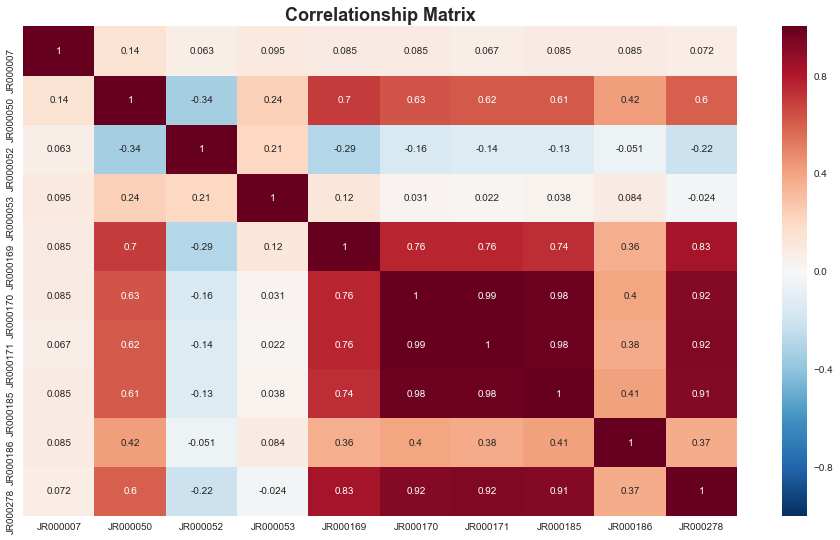

In [98]:
# visualization 
plt.figure(figsize=(16,9))
ax = plt.axes()
sns.heatmap(coeff_matrix ,ax=ax, annot=True)
ax.set_title('Correlationship Matrix',fontsize=18, fontweight='bold')
plt.show()

In [99]:
# cov
fund_cov = weekly_return.cov()

In [100]:
weekly_return.dropna()

,JR000007,JR000050,JR000052,JR000053,JR000169,JR000170,JR000171,JR000185,JR000186,JR000278
date,,,,,,,,,,
2014-05-30,0.040553,0.001358,-0.021461,-0.011104,0.016304,0.004699,0.002953,0.003000,0.038110,0.003071
2014-07-18,-0.026572,0.010033,0.041935,0.009612,0.001783,0.010290,0.016683,0.010967,0.021406,0.029592
2014-07-25,0.015469,-0.002416,-0.010010,0.015571,0.038256,0.000000,0.001931,0.001972,0.018966,0.015857
2014-08-01,0.000896,0.006190,-0.005679,0.009112,0.023136,0.000926,0.000963,0.000984,0.004374,0.011707
2014-09-05,0.028648,0.010253,0.029742,-0.014239,0.015075,0.008326,0.014437,0.007866,0.075982,0.033751
2014-10-31,-0.026110,0.023299,0.048160,0.025806,-0.000825,0.039450,0.037951,0.044878,0.030141,0.030784
2014-11-21,0.027703,0.003536,0.001678,0.000172,-0.013212,0.004413,0.010969,0.013072,-0.004013,0.007240
2015-01-16,0.008696,0.100808,-0.090646,0.005065,0.360669,0.289104,0.275769,0.266359,0.111633,0.343217
2015-01-23,-0.024138,0.007339,0.010769,0.010164,0.056581,-0.062031,-0.048193,-0.055313,-0.018046,-0.010033


In [101]:
# to calShrunkCov
def calShrunkCov(weekly_return):
    '''calculate Shrunk Covariance. ie. a 10 asset return array should return 10 * 10 dimension array
    Input: N * K np.array . 
    Output: N * N array'''
    return ShrunkCovariance(0.1).fit(weekly_return.dropna().values).covariance_

In [102]:
# descriptive information 
descri_info = weekly_return.describe().round(4)
descri_info.T

,count,mean,std,min,25%,50%,75%,max
JR000007,117.0,0.0032,0.0295,-0.0959,-0.0105,0.0027,0.0184,0.1344
JR000050,117.0,0.0025,0.0102,-0.0084,-0.0002,0.0003,0.0017,0.1008
JR000052,117.0,0.0040,0.0152,-0.0906,-0.0013,0.0021,0.0082,0.0482
JR000053,117.0,0.0019,0.0083,-0.0221,-0.0008,0.0002,0.0040,0.0412
JR000169,117.0,0.0069,0.0449,-0.1243,-0.0134,0.0024,0.0200,0.3607
JR000170,117.0,0.0055,0.0406,-0.1214,-0.0044,0.0012,0.0123,0.2891
JR000171,117.0,0.0053,0.0396,-0.1091,-0.0054,0.0012,0.0144,0.2758
JR000185,117.0,0.0060,0.0386,-0.1108,-0.0042,0.0016,0.0161,0.2664
JR000186,117.0,0.0059,0.0269,-0.0753,-0.0075,0.0043,0.0166,0.1116
JR000278,117.0,0.0063,0.0481,-0.1569,-0.0091,0.0051,0.0197,0.3432


In [103]:
#descri_info.T.reset_index().to_sql(name='multiple_funds_description',con=db_engine, if_exists='replace',index=False) 

In [104]:
# ------------------------------ minimize risk ---------------------------------

In [105]:
tANetWorth = fund_data_merged /fund_data_merged.iloc[0]

tACovMatrix = tANetWorth.ewm(ignore_na=True, min_periods=0, halflife = 60).cov(pairwise = True).iloc[-1]

endOfMonthList = tANetWorth.index
positionSheetMR = pd.DataFrame(index=tANetWorth.index, columns = tANetWorth.columns, data= None, dtype =float)
positionSheetRB = positionSheetMR.copy()

In [106]:
positionSheetRB

,JR000007,JR000050,JR000052,JR000053,JR000169,JR000170,JR000171,JR000185,JR000186,JR000278
date,,,,,,,,,,
2014-03-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-05-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-07-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-07-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
endOfMonthList

DatetimeIndex(['2014-03-28', '2014-05-30', '2014-07-18', '2014-07-25',
               '2014-08-01', '2014-09-05', '2014-10-31', '2014-11-21',
               '2015-01-16', '2015-01-23',
               ...
               '2017-03-10', '2017-03-17', '2017-03-24', '2017-04-07',
               '2017-04-14', '2017-04-21', '2017-04-28', '2017-05-05',
               '2017-05-12', '2017-05-19'],
              dtype='datetime64[ns]', name=u'date', length=118, freq=None)

In [108]:
def cal_minRisk_weight(cov):
    '''To calculate weight of portfolio with min Risk
    Input: Cov: n-d array, obtained from df.values
    Output: 1-d array, the weight vector'''
    stkNum = cov.shape[1]
    P = cv.matrix(cov)
    q = cv.matrix(0.0, (stkNum, 1))
    G = cv.matrix(np.concatenate((np.diag(np.ones(stkNum)), - np.diag(np.ones(stkNum)))))
    h = cv.matrix(np.append(0.2 * np.ones(stkNum), np.zeros(stkNum)))
    A = cv.matrix(np.ones(stkNum)).T
    b = cv.matrix(1.0).T
    sol = solvers.qp(P, q, G, h, A, b)
    return  np.array(list(sol['x']))

In [109]:
# backtest (change position at the end of each month)
returnDF = tANetWorth.pct_change()
for date in tANetWorth.index:
    tempdf = returnDF.loc[:date]
    tempNWdf = tANetWorth.loc[:date]
    if date in endOfMonthList and  tempdf.shape[0] >= 5 * NumOfAsset: # burn in period

        temCovMatrix = calShrunkCov(tempdf.iloc[-5*NumOfAsset:])
        #print temCovMatrix
        # Optimize 
        '''stkNum = temCovMatrix.shape[1]
        P = cv.matrix(temCovMatrix)
        q = cv.matrix(0.0, (stkNum, 1))
        G = cv.matrix(np.concatenate((np.diag(np.ones(stkNum)), - np.diag(np.ones(stkNum)))))
        h = cv.matrix(np.append(0.2 * np.ones(stkNum), np.zeros(stkNum)))
        A = cv.matrix(np.ones(stkNum)).T
        b = cv.matrix(1.0).T
        sol = solvers.qp(P, q, G, h, A, b)'''
        
        positionSheetMR .loc[date] = cal_minRisk_weight(temCovMatrix)
        positionSheetRB.loc[date] = cal_RB_weight(temCovMatrix)

     pcost       dcost       gap    pres   dres
 0:  4.7780e-04 -2.0006e+00  2e+00  0e+00  3e-16
 1:  4.7721e-04 -2.0590e-02  2e-02  1e-16  5e-16
 2:  4.2859e-04 -6.7867e-04  1e-03  2e-16  3e-17
 3:  1.6252e-04 -8.1274e-06  2e-04  1e-16  1e-18
 4:  1.0036e-04  7.9044e-05  2e-05  8e-17  4e-19
 5:  9.0850e-05  8.8580e-05  2e-06  8e-17  2e-19
 6:  9.0079e-05  8.9748e-05  3e-07  1e-16  1e-19
 7:  8.9879e-05  8.9830e-05  5e-08  1e-16  2e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.6831e-04 -2.0006e+00  2e+00  1e-16  3e-16
 1:  4.6775e-04 -2.0578e-02  2e-02  9e-17  7e-16
 2:  4.2090e-04 -6.7095e-04  1e-03  6e-17  4e-17
 3:  1.5984e-04 -7.8118e-06  2e-04  1e-16  1e-18
 4:  9.8781e-05  7.7836e-05  2e-05  2e-16  2e-19
 5:  8.9482e-05  8.7256e-05  2e-06  2e-16  1e-19
 6:  8.8748e-05  8.8430e-05  3e-07  1e-16  1e-19
 7:  8.8564e-05  8.8514e-05  5e-08  2e-16  2e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.6834e-04 -2.0006e

In [110]:
positionSheetRB

,JR000007,JR000050,JR000052,JR000053,JR000169,JR000170,JR000171,JR000185,JR000186,JR000278
date,,,,,,,,,,
2014-03-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-05-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-07-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-07-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
#positionSheet1 = positionSheet.shift(1)
positionSheet1 = positionSheetMR .shift(1).fillna(method='ffill').fillna(0)
positionSheet2 = positionSheetRB .shift(1).fillna(method='ffill').fillna(0)
positionSheet2

,JR000007,JR000050,JR000052,JR000053,JR000169,JR000170,JR000171,JR000185,JR000186,JR000278
date,,,,,,,,,,
2014-03-28,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2014-05-30,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2014-07-18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2014-07-25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2014-08-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2014-09-05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2014-10-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2014-11-21,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2015-01-16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [112]:
#totalNWMR

In [113]:
#totalNWRB

In [114]:
weekly_return

,JR000007,JR000050,JR000052,JR000053,JR000169,JR000170,JR000171,JR000185,JR000186,JR000278
date,,,,,,,,,,
2014-03-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-05-30,0.040553,0.001358,-0.021461,-0.011104,0.016304,0.004699,0.002953,0.003000,0.038110,0.003071
2014-07-18,-0.026572,0.010033,0.041935,0.009612,0.001783,0.010290,0.016683,0.010967,0.021406,0.029592
2014-07-25,0.015469,-0.002416,-0.010010,0.015571,0.038256,0.000000,0.001931,0.001972,0.018966,0.015857
2014-08-01,0.000896,0.006190,-0.005679,0.009112,0.023136,0.000926,0.000963,0.000984,0.004374,0.011707
2014-09-05,0.028648,0.010253,0.029742,-0.014239,0.015075,0.008326,0.014437,0.007866,0.075982,0.033751
2014-10-31,-0.026110,0.023299,0.048160,0.025806,-0.000825,0.039450,0.037951,0.044878,0.030141,0.030784
2014-11-21,0.027703,0.003536,0.001678,0.000172,-0.013212,0.004413,0.010969,0.013072,-0.004013,0.007240
2015-01-16,0.008696,0.100808,-0.090646,0.005065,0.360669,0.289104,0.275769,0.266359,0.111633,0.343217


In [115]:
mrpos = positionSheet1.iloc[-1]
mrpos.name = 'Minimized_Risk'
rppos = positionSheet2.iloc[-1]
rppos.name = 'Risk_Parity'

posref = pd.concat([mrpos,rppos],axis=1)
posref['Equal_Weighetd'] = 1. / posref.shape[0]
posref = posref.round(4)

In [117]:
# 上传
#posref.reset_index().to_sql(name='multiple_funds_position',con=db_engine, if_exists='replace',index=False) 

In [ ]:
# calculate networth and show the plot
retMR = (positionSheet1 * weekly_return).sum(axis=1)
retRB =  (positionSheet2 * weekly_return).sum(axis=1)
retEW= (weekly_return.sum(axis=1)/ NumOfAsset)
retEW.name = 'Equal_Weighetd'

retMR .name ='Minimized_Risk'
retRB .name = 'Risk_Parity'

retTotal = pd.concat([retMR  ,retRB ,retEW],axis=1)
retTotal.index.name = 'time'
retTotal = retTotal.dropna()
retTotal = retTotal.loc[retTotal[retTotal[retMR .name] ==0].index[-1]:]
retTotal.iloc[0] = 0 
#retTotal = retTotal / retTotal.iloc[0]
fig = plt.figure(figsize=(14,9))
# Add a subplot
ax = fig.add_subplot(111)
retTotal.cumsum().plot(figsize=(22,14),ax=ax,title ='Cumulative Return',fontsize =13)
ax.set_title(ax.get_title(),alpha=0.7, fontsize=30, ha='right')

In [ ]:
retTotal = retTotal.round(4)

In [ ]:
from sqlalchemy import create_engine 
import sqlalchemy.engine.url as url
#MSText(length=255) 
db_engine = create_engine('mysql://{0}:{1}@{2}:{3}/{4}'.format('tai', 'tai2015', '119.254.153.20', 13311, 'PrivateEquityFund_W',encoding='utf-8'))
#retTotal.reset_index().to_sql(name='multiple_funds_comb_ret',con=db_engine, if_exists='replace',index=False) 

In [ ]:
# --------------------------------------- Risk Parity -------------------------------------------------------

In [ ]:
def object_fun(x,return_cov):
    '''objective function for Risk budget portfolio
    Input: x ,n-d array ,the weight vector
           return_cov, the covariance of the asset return
    Output: ovjective function'''
    N = x.shape[0]   # get the number of asset
    covMatrix = np.matrix(return_cov)
    x = np.matrix(x)
    y = np.array(x) * (np.array(covMatrix * x.T).T)
    totalRisk = x * covMatrix * x.T
    b = totalRisk / N
    y = np.squeeze(np.asarray(y))  # return 1 dimension array in order to perform indexing
    totalY = y.sum()
    fval = 0
    for i in range(0,N):
        xi = (y[i]/totalY - b ) ** 2
        fval =fval +xi
    return fval

In [ ]:
def cal_RB_weight(cov):
    '''
    To calculate weight of portfolio with risk parity(the special case for risk budget portfolio)
    Input: Cov: n-d array, obtained from df.values
    Output: 1-d array, the weight vector
    '''
    
    bnds = ((0,1),) * cov.shape[0] # bounds for weights (number of bounds  = to number of assets)
    cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x)-1.0})
    x0 = np.ones(cov.shape[0]) * 1 / cov.shape[0]
    res= sp.optimize.minimize(object_fun, x0, args=cov,method='SLSQP',constraints=cons,bounds=bnds)
    if res.success:
        allocation = res.x
        allocation[allocation<0]=0  # since fund can not be shorted!
        denom = np.sum(allocation)
        if denom != 0:         #  normalization process
            allocation = allocation/denom
    else:
        allocation = x0
    return allocation

In [ ]:
def fitnessERC(x, *args):
    N = x.shape[0]     #  
    p = np.squeeze(np.asarray(args))
    Acov = np.cov(p.T)
    print Acov
    Acov = np.matrix(Acov)
    x = np.matrix(x)
    y = np.array(x) * np.array( Acov * x.T ).T   #
    var = x * Acov * x.T
    b = var/N    # risk budget , here we assume that risk budget is equally weighted
    fval = 0     # initial value
    y = np.squeeze(np.asarray(y))
    for i in range(0,N):
        xij  = (y[i]/y.sum() - b)**2
        fval = fval + xij
    return fval

In [ ]:
bnds = ((0,1),) * 10 #bounds for weights (number of bounds  = to number of assets)
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x)-1.0})
x0 = np.ones(10) * 0.1
res= sp.optimize.minimize(object_fun, x0, args=fund_cov.values,method='SLSQP',constraints=cons,bounds=bnds)
print res.x
if res.success:
    allocation = res.x
    allocation[allocation<0]=0
    denom = np.sum(allocation)
    if denom != 0:         #  normalization process
        allocation = allocation/denom
else:
    allocation = x0

In [ ]:
s = np.array([5,8,10])

In [ ]:
d = np.array([[1,2,3],[4,5,6],[7,5,6]])
d = np.matrix(d)
d

In [ ]:
s * np.squeeze(np.array((d * np.matrix(s).T).T))

In [ ]:
np.squeeze(np.asarray(s *(np.array((d * np.matrix(s).T).T))))[2]

In [ ]:
np.squeeze(np.array((d * np.matrix(s).T).T))

In [ ]:
s * np.array((d * np.matrix(s).T).T)